In [1]:
#!conda install pandas==1.1.3
#!conda install seaborn==0.11.0

import zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline
!wget -N https://raw.githubusercontent.com/Call-for-Code/Spot-Challenge-Wildfires/main/data/Nov_10.zip
zip = zipfile.ZipFile("Nov_10.zip")
zip.extractall()
!ls -l Nov_10


--2021-05-05 23:16:29--  https://raw.githubusercontent.com/Call-for-Code/Spot-Challenge-Wildfires/main/data/Nov_10.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18988121 (18M) [application/zip]
Saving to: ‘Nov_10.zip’

Nov_10.zip          100%[===================>]  18.11M  --.-KB/s    in 0.09s   

Last-modified header missing -- time-stamps turned off.
2021-05-05 23:16:30 (192 MB/s) - ‘Nov_10.zip’ saved [18988121/18988121]

total 55500
-rw-r--r-- 1 root root 28599724 May  5 23:16 HistoricalWeather.csv
-rw-r--r-- 1 root root 26072107 May  5 23:16 HistoricalWeatherForecasts.csv
-rw-r--r-- 1 root root  2048982 May  5 23:16 Historical_Wildfires.csv
-rw-r--r-- 1 root root      813 May  5 23:16 LandClass.csv
-rw-r--r-- 1 root root    98276 May  5 23:16 Vege

Number of records: 26406
Number of regions: 7

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA']


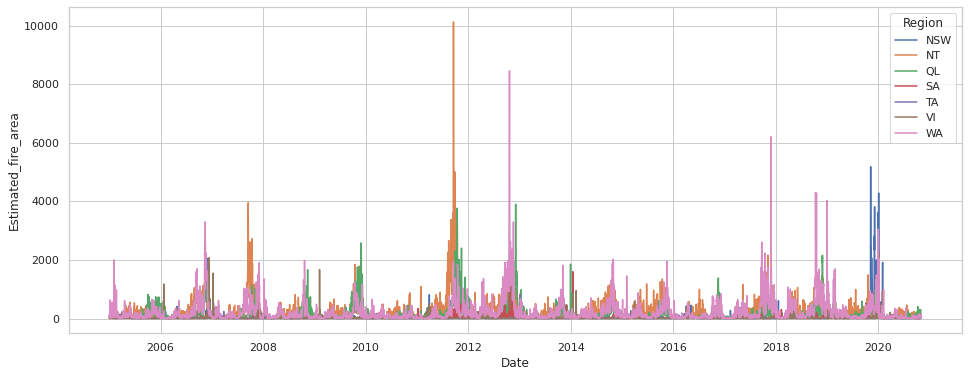

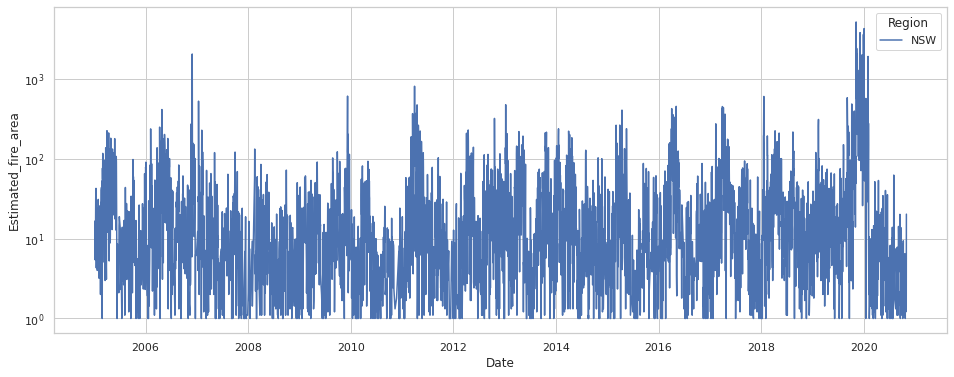

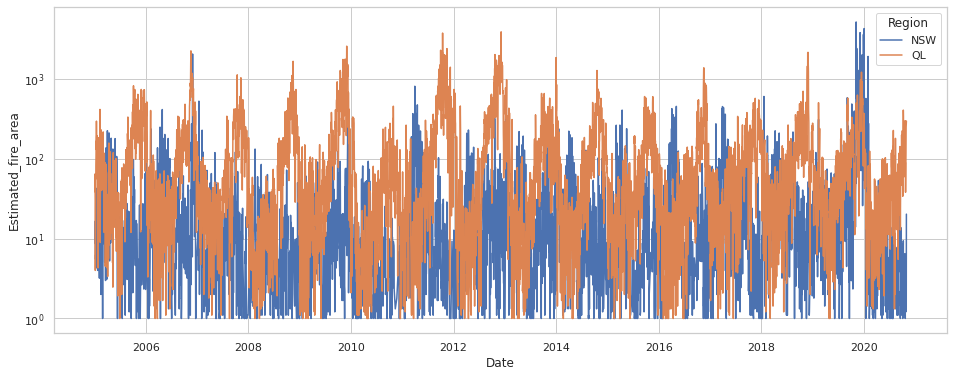

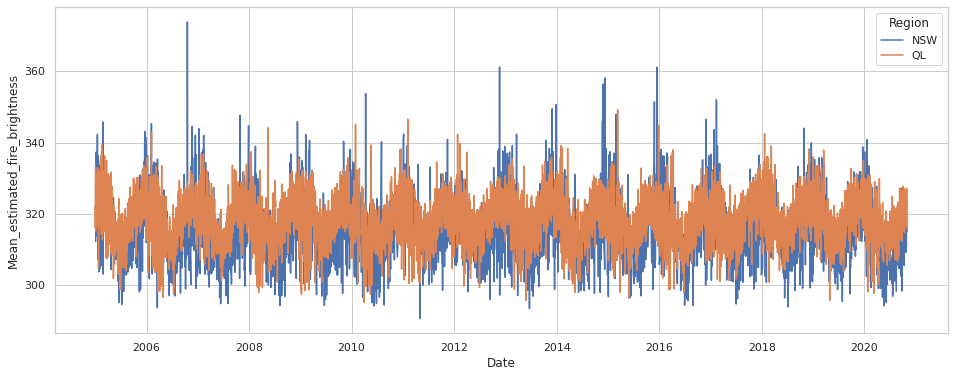

In [3]:
file_wildfires = "/content/Nov_10/Historical_Wildfires.csv"
wildfires_df = pd.read_csv(file_wildfires)
wildfires_df['Date'] = pd.to_datetime(wildfires_df['Date'])
wildfires_df.head()

wildfires_df.dtypes

wildfires_df.describe().transpose()
print("Number of records: {}".format(len(wildfires_df)))
print("Number of regions: {}\n".format(len(wildfires_df['Region'].unique())))
print(wildfires_df['Region'].unique())
# check for missing values
wildfires_df.isna().sum()
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region', data=wildfires_df)
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[wildfires_df['Region']=='NSW'])
g.set_yscale("log")
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='QL') | (wildfires_df['Region']=='NSW')])
g.set_yscale("log")

plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Mean_estimated_fire_brightness",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='QL') | (wildfires_df['Region']=='NSW')])

Number of records: 242781
Number of regions: 7

['NSW' 'NT' 'QL' 'SA' 'TA' 'VI' 'WA']


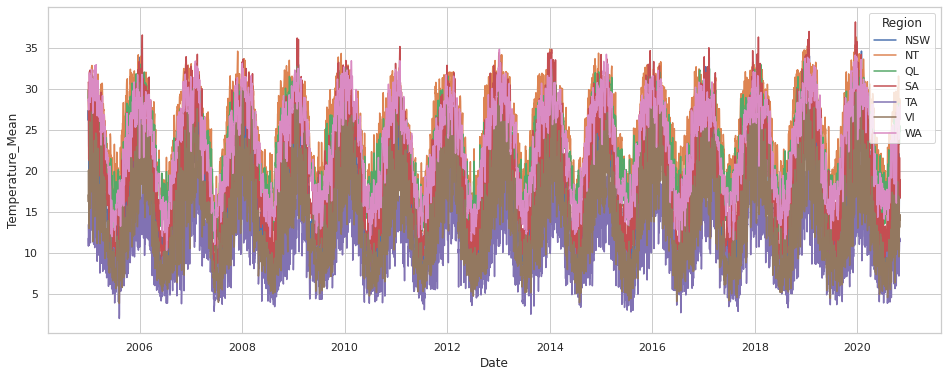

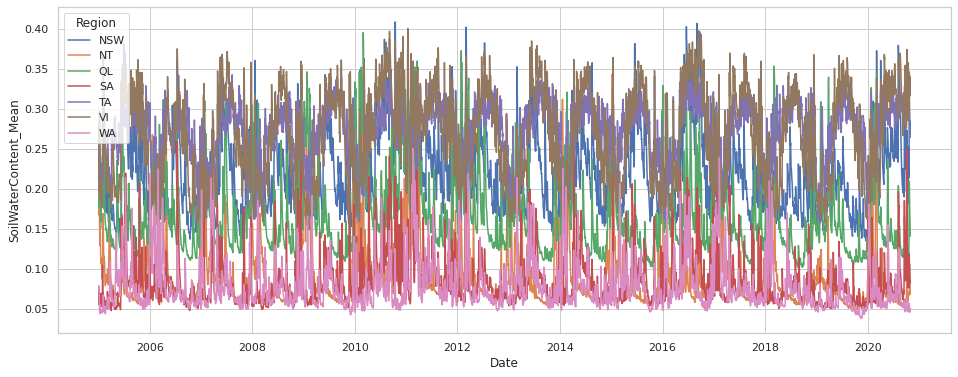

In [4]:

file_weather = "/content/Nov_10/HistoricalWeather.csv"
weather_df = pd.read_csv(file_weather)

# rename columns
weather_df = weather_df.rename(columns={"count()[unit: km^2]": "Area", "min()": "Min",
                                       "max()": "Max", "mean()": "Mean", "variance()": "Variance"})

weather_df['Date'] = pd.to_datetime(weather_df['Date'])

weather_df.head()

print("Number of records: {}".format(len(weather_df)))
print("Number of regions: {}\n".format(len(weather_df['Region'].unique())))
print(weather_df['Region'].unique())
# check for missing values
weather_df.isna().sum()
# check the data types for each column
weather_df.dtypes
weather_df.head()
weather_df['Area'].unique()
# Reformat the data
df_pivot = weather_df.pivot_table(values=['Min','Max','Mean','Variance'], index=['Date','Region'],
                                  columns=['Parameter'])
# Reset dataframe index
df_pivot.reset_index(inplace=True)

# Renaming Column names
df_pivot.columns = [col[0] if not(col[1]) else '{1}_{0}'.format(*col) for col in df_pivot.columns.values]

# Rearranging Data and column
params = df_pivot.columns.tolist()[3:]
params.sort()
weather_data = df_pivot[df_pivot.columns.tolist()[:3] + params].copy()
weather_data.head()
weather_data.dtypes
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Temperature_Mean",hue='Region', data=weather_data)
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="SoilWaterContent_Mean",hue='Region', data=weather_data)
#g = sns.lineplot(x="Date", y="SoilWaterContent_Min",hue='Region', data=weather_data)


Region                               object
Date                         datetime64[ns]
Vegetation_index_mean               float64
Vegetation_index_max                float64
Vegetation_index_min                float64
Vegetation_index_std                float64
Vegetation_index_variance           float64
dtype: object


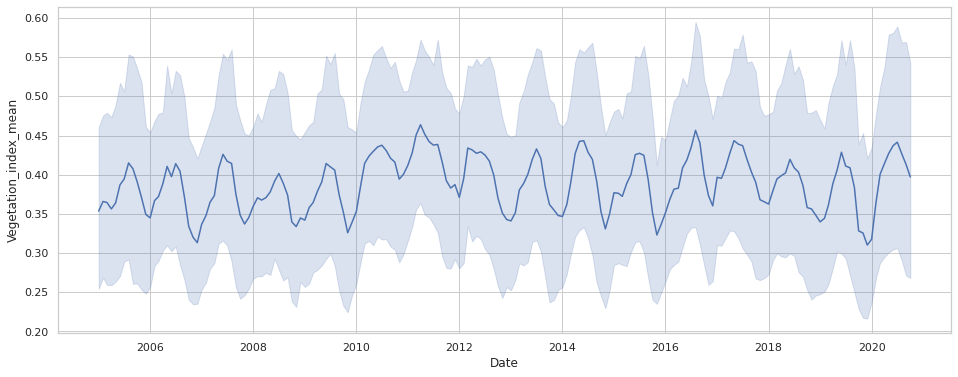

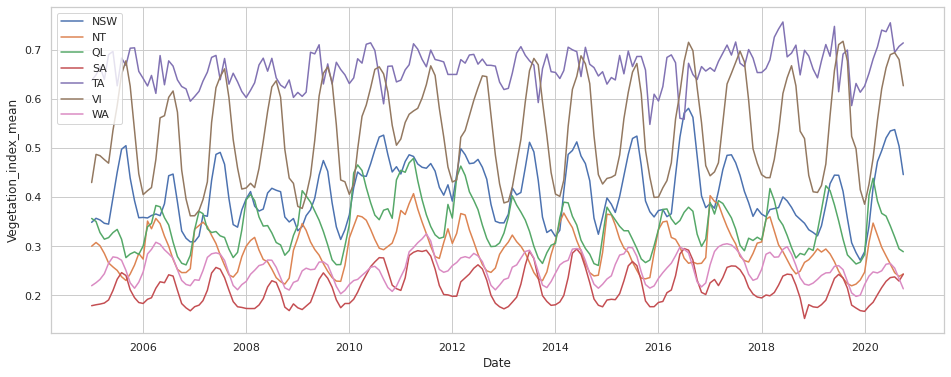

In [5]:
file_wildfires = "/content/Nov_10/VegetationIndex.csv"
ndvi_df = pd.read_csv(file_wildfires)

# convert to datetime format
ndvi_df['Date'] = pd.to_datetime(ndvi_df['Date'])

print (ndvi_df.dtypes)
ndvi_df.head()
ndvi_df['Region'].unique()
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Vegetation_index_mean", data=ndvi_df)
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Vegetation_index_mean",hue='Region', data=ndvi_df)
plt.legend(loc='best')

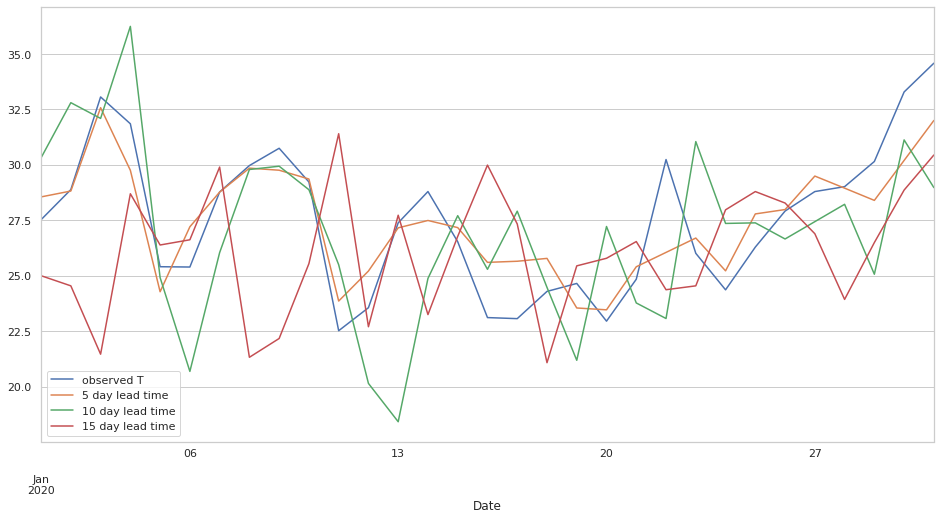

In [6]:
file_forecasts = "/content/Nov_10/HistoricalWeatherForecasts.csv"
forecasts_df = pd.read_csv(file_forecasts)
forecasts_df['Date'] = pd.to_datetime(forecasts_df['Date'])

forecasts_df.head()

# check how many predictions there are for each day
forecasts_df['Lead time'].unique()
# select data for one month in one region
d1 = '2020-01-01'
d2 ='2020-01-31'
r1 = 'NSW'

forecast1 = forecasts_df[(forecasts_df['Parameter']== 'Temperature') & (forecasts_df['Region']== r1)]
forecast1 = forecast1.set_index(['Date'])
forecast2 = forecast1.loc[d1:d2]
forecast2.head()
# also find the observed weather for the same period
weather_data_NSW = weather_data[weather_data['Region']=='NSW']

weather_data_NSW = weather_data_NSW.set_index(['Date'])
obs1 = weather_data_NSW.loc[d1:d2]
obs1.head()
# compare them in a plot

[fig,ax] = plt.subplots(1, figsize=(16, 8))

obs1['Temperature_Mean'].plot();

forecast2['mean()'][forecast2['Lead time']== 5].plot();
forecast2['mean()'][forecast2['Lead time']== 10].plot();
forecast2['mean()'][forecast2['Lead time']== 15].plot();

ax.legend(['observed T','5 day lead time','10 day lead time','15 day lead time']);


In [7]:

# merge historical fire and weather data into one DataFrame
df_all = wildfires_df.merge(weather_data, how='left', on=['Date', 'Region'])
df_all.describe().transpose()

df_NSW = df_all[df_all['Region']=='NSW']
df_NSW.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,22.842566,2.808620,0.0,17.383363,90.332771,57.095628,31.279930,267.158378,0.444927,0.214293,0.022578,0.009965,33.214062,22.617291,7.576938,40.255460,28.945488,23.055527,12.495799,9.455474,7.364222,4.841764,1.401951,1.494301
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,7.657155,0.157935,0.0,0.273471,88.623436,47.170735,24.466665,195.639724,0.442955,0.203951,0.019950,0.009483,33.554867,28.076835,14.087289,29.763055,29.510120,22.425765,9.611800,13.352380,7.091141,4.014080,1.011328,1.043316
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,27.616505,0.434833,0.0,4.634465,92.850960,39.874638,21.705952,213.300558,0.431879,0.193668,0.020037,0.008750,34.075787,30.561703,12.310518,22.667707,26.982698,20.621405,9.024039,11.764178,9.905821,4.477879,0.930842,1.953685
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,3.839235,0.064224,0.0,0.038927,79.103134,39.279410,16.215517,245.624576,0.418513,0.183778,0.018115,0.007799,34.019218,32.143718,16.044561,6.949267,24.752069,19.632722,8.691216,7.940373,10.446799,4.017578,1.601724,1.102751
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2.866673,0.203352,0.0,0.236269,83.001541,42.400824,14.008522,342.996833,0.413370,0.175935,0.014398,0.007482,33.265091,29.347715,15.209880,27.822830,26.472469,21.477315,10.821342,12.063971,6.671862,3.884550,1.167861,0.774612


<Figure size 864x864 with 0 Axes>

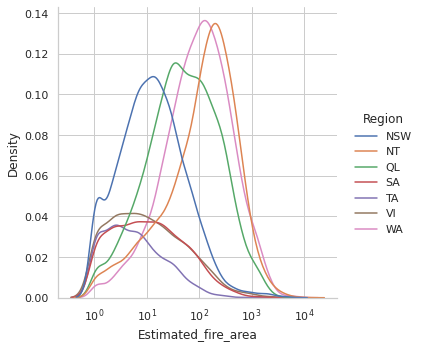

<Figure size 864x864 with 0 Axes>

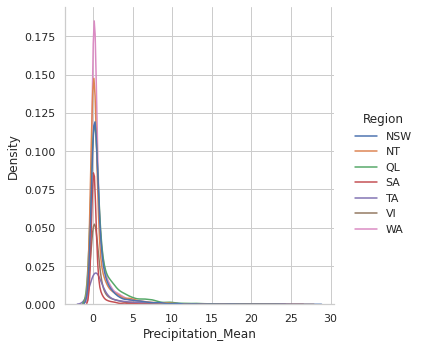

<Figure size 864x864 with 0 Axes>

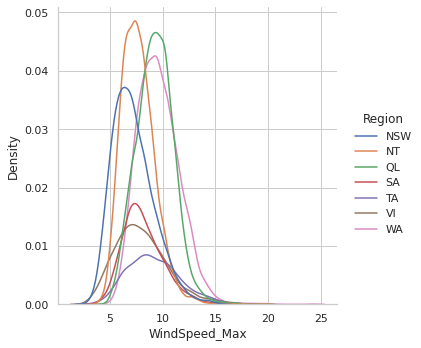

In [8]:
#Data distribution 
plt.figure(figsize=(12, 12));
sns.set(style="whitegrid")
#g = sns.displot(data=df_all, x="Estimated_fire_area", hue="Region", kind="kde");
g = sns.displot(data=df_all, x="Estimated_fire_area", hue="Region", kind="kde", log_scale=True);
plt.figure(figsize=(12, 12));
sns.set(style="whitegrid")
g = sns.displot(data=df_all, x="Precipitation_Mean", hue="Region", kind="kde");
plt.figure(figsize=(12, 12));
sns.set(style="whitegrid")
g = sns.displot(data=df_all, x="WindSpeed_Max", hue="Region", kind="kde");

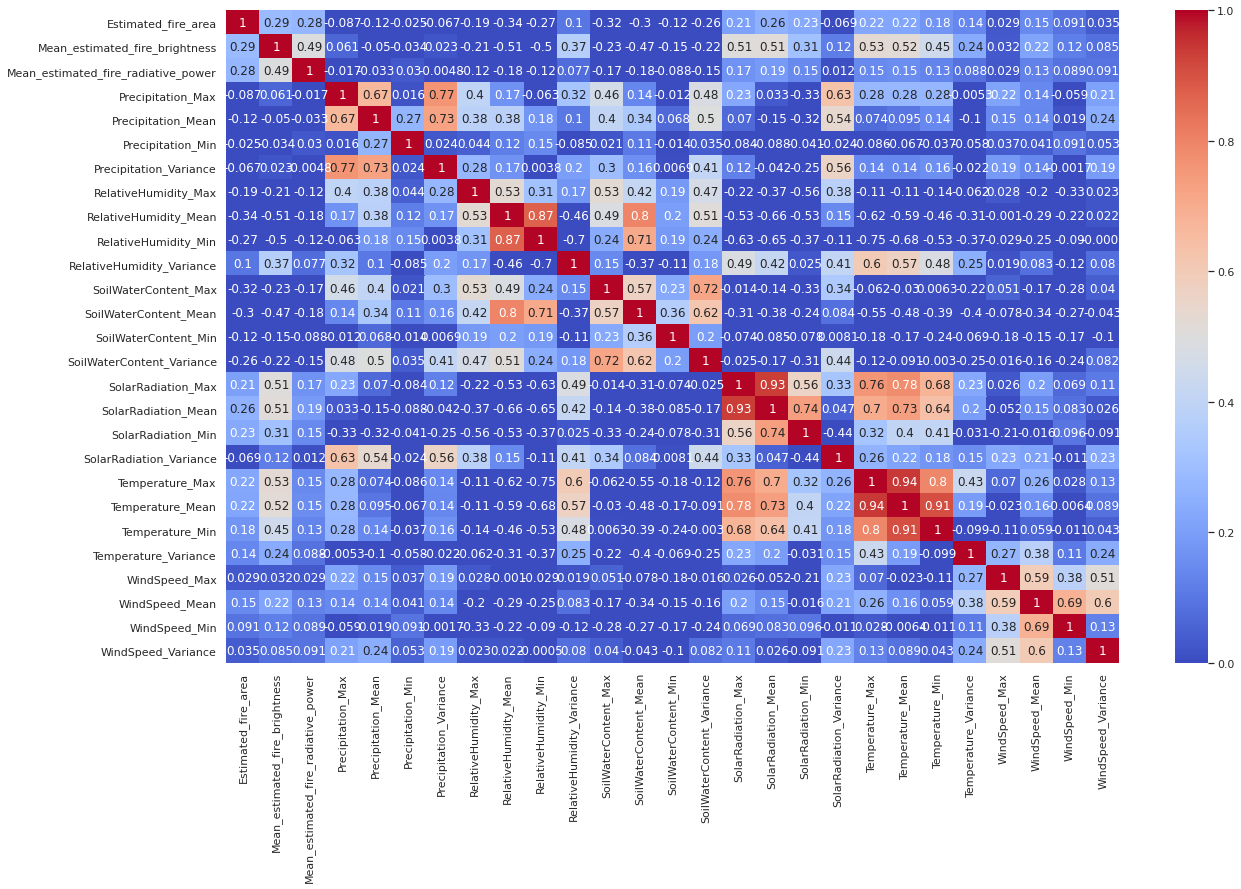

In [9]:
#correlations 
df_corr = df_all.drop(['Region', 'Date', 'Mean_confidence', 'Std_confidence', 'Var_confidence',
                            'Count', 'Replaced'], axis=1).copy()

plt.figure(figsize = (20, 12))
sns.heatmap(df_corr.corr(), cmap = "coolwarm", annot= True, vmin = 0, vmax = 1);

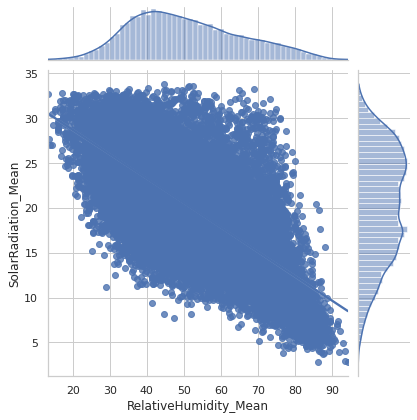

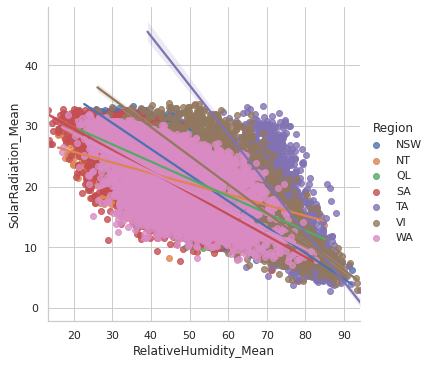

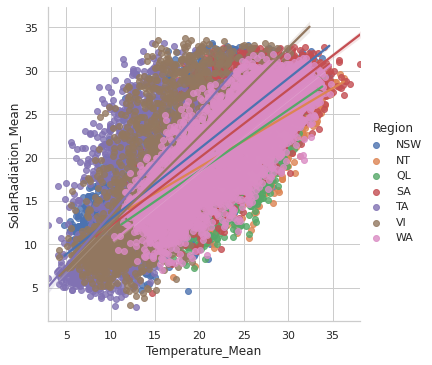

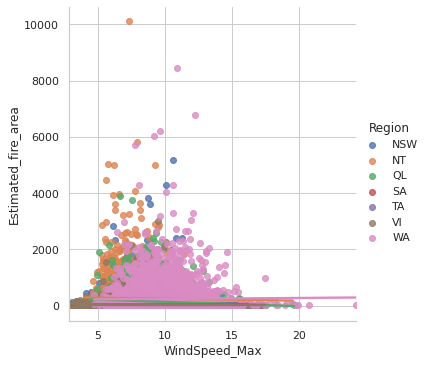

In [10]:
sns.jointplot(x='RelativeHumidity_Mean', y='SolarRadiation_Mean', data=df_all, kind="reg");
sns.lmplot(x='RelativeHumidity_Mean', y='SolarRadiation_Mean', hue='Region', data=df_all);
sns.lmplot(x='Temperature_Mean', y='SolarRadiation_Mean', hue='Region', data=df_all);
sns.lmplot(x='WindSpeed_Max', y='Estimated_fire_area', hue='Region', data=df_all);

In [11]:
df_all2 = df_all[df_all['Region']=='NSW'].copy()
df_all2.drop_duplicates(inplace=True)
df_all2.reset_index(drop=True, inplace=True)
df_all2 = df_all2.dropna(how='any')

X = df_all2.drop(['Date','Estimated_fire_area','Region','Mean_confidence', 'Std_confidence',
                 'Var_confidence','Count','Replaced'],
                axis=1).copy()
y = df_all2['Estimated_fire_area'].copy()

# size of the data
df_all2.shape
# check for missing values
df_all2.isna().sum()

# one more quick check of the features
X.corr().style.background_gradient(cmap='coolwarm')

,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Precipitation_Max,Precipitation_Mean,Precipitation_Min,Precipitation_Variance,RelativeHumidity_Max,RelativeHumidity_Mean,RelativeHumidity_Min,RelativeHumidity_Variance,SoilWaterContent_Max,SoilWaterContent_Mean,SoilWaterContent_Min,SoilWaterContent_Variance,SolarRadiation_Max,SolarRadiation_Mean,SolarRadiation_Min,SolarRadiation_Variance,Temperature_Max,Temperature_Mean,Temperature_Min,Temperature_Variance,WindSpeed_Max,WindSpeed_Mean,WindSpeed_Min,WindSpeed_Variance
Mean_estimated_fire_brightness,1.000000,0.442646,0.089368,0.022202,-0.031045,0.038731,-0.176265,-0.501825,-0.494783,0.450530,-0.035370,-0.364030,0.026731,-0.130872,0.571469,0.560743,0.397344,0.217168,0.566460,0.564107,0.520916,0.435140,0.014605,0.140584,0.127583,0.114130
Mean_estimated_fire_radiative_power,0.442646,1.000000,0.034846,-0.004331,-0.003981,0.008386,-0.051957,-0.166026,-0.138056,0.104567,-0.040461,-0.148532,-0.001719,-0.110585,0.159339,0.157879,0.113367,0.060606,0.175115,0.169309,0.141458,0.136003,0.021098,0.085722,0.057215,0.040805
Precipitation_Max,0.089368,0.034846,1.000000,0.735082,0.056778,0.745036,0.447129,0.221564,0.136150,0.150025,0.438723,0.225442,0.188893,0.266426,0.074036,-0.085220,-0.330855,0.561397,0.086586,0.092140,0.100010,-0.034846,0.184335,0.279460,0.131596,0.211497
Precipitation_Mean,0.022202,-0.004331,0.735082,1.000000,0.225382,0.725622,0.358777,0.303989,0.217681,0.022537,0.369087,0.327440,0.241051,0.126092,0.015170,-0.161190,-0.287452,0.447429,0.065472,0.071045,0.090811,-0.057239,0.123416,0.249757,0.102117,0.235628
Precipitation_Min,-0.031045,-0.003981,0.056778,0.225382,1.000000,0.038252,0.032582,0.079126,0.088783,-0.053800,0.031537,0.082106,0.061082,-0.054781,-0.051783,-0.060615,-0.048556,-0.008343,-0.024928,-0.017108,-0.003177,-0.045730,0.031536,0.061884,0.004627,0.067647
Precipitation_Variance,0.038731,0.008386,0.745036,0.725622,0.038252,1.000000,0.227465,0.152136,0.092236,0.096223,0.271539,0.192591,0.132885,0.162061,0.042855,-0.069844,-0.190258,0.450513,0.057008,0.064349,0.079797,-0.030940,0.122311,0.152380,0.067746,0.145734
RelativeHumidity_Max,-0.176265,-0.051957,0.447129,0.358777,0.032582,0.227465,1.000000,0.597654,0.498223,-0.037787,0.439127,0.396107,0.191621,0.296881,-0.340891,-0.478058,-0.660907,0.344083,-0.233916,-0.239221,-0.205287,-0.231718,0.030180,0.012901,-0.094233,-0.056397
RelativeHumidity_Mean,-0.501825,-0.166026,0.221564,0.303989,0.079126,0.152136,0.597654,1.000000,0.916219,-0.614782,0.396838,0.765947,0.280746,0.296564,-0.762187,-0.847087,-0.781373,-0.006043,-0.703125,-0.698338,-0.606501,-0.648748,-0.047408,-0.204683,-0.271066,-0.162705
RelativeHumidity_Min,-0.494783,-0.138056,0.136150,0.217681,0.088783,0.092236,0.498223,0.916219,1.000000,-0.769625,0.291596,0.708018,0.304720,0.110865,-0.751769,-0.809041,-0.698203,-0.116879,-0.693091,-0.681803,-0.603335,-0.649423,0.042597,-0.119538,-0.178544,-0.120110
RelativeHumidity_Variance,0.450530,0.104567,0.150025,0.022537,-0.053800,0.096223,-0.037787,-0.614782,-0.769625,1.000000,0.016056,-0.514466,-0.184187,0.094507,0.606675,0.594451,0.350601,0.367744,0.637016,0.625817,0.578812,0.630697,-0.124111,0.021114,-0.003984,0.075687


In [13]:
#linear regressing model
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create linear regression object
regr = linear_model.LinearRegression()

# train the model using the training data
regr.fit(X_train, y_train)

# make predictions using the test data
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination (r2): %.2f' % r2_score(y_test, y_pred))
# normalize the data
scaler = StandardScaler().fit(X_train)

X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(X_train2, np.log(y_train))

# Make predictions using the test data
y_pred = regr.predict(X_test2)

print('Coefficients: \n', regr.coef_)
print('RMSE: %.2f' % np.sqrt(mean_squared_error(np.log(y_test), y_pred)))
print('Coefficient of determination (r2): %.2f' % r2_score(np.log(y_test), y_pred))

Coefficients: 
 [-1.49864129e-01  5.56653945e-01  2.63990169e-01  4.35203295e+00
 -9.87709462e+01  6.85488412e-02  2.82437828e+00 -2.75570178e+00
 -2.00867525e-01 -3.40354422e-01 -4.03078779e+02  1.65996630e+02
 -1.63761080e+03 -2.57117900e+03 -6.31838838e+00  7.42019593e+00
 -5.89170695e-01  5.36035881e-02 -6.72548529e-01  1.35642431e+01
 -1.10569387e+01  5.49536079e-01  3.13394558e+00  1.49575633e+01
 -4.80322334e+01 -1.68231067e+01]
RMSE: 221.28
Coefficient of determination (r2): 0.11
Coefficients: 
 [-0.04592253  0.49449361  0.01700134  0.00616261 -0.01895765  0.06376674
  0.02166007 -0.08606667 -0.23508429 -0.24849387 -0.04101943 -0.35112408
  0.03096199 -0.08057969 -1.06726052  0.69597497 -0.02688283  0.12020455
  0.16120555  0.03710044  0.01582056 -0.0603015   0.0273023   0.10008341
 -0.0822503  -0.05024538]
RMSE: 1.08
Coefficient of determination (r2): 0.31


In [14]:
#desicion tree model
tree = DecisionTreeRegressor(max_depth=3,random_state=42)
tree.fit(X_train2, np.log(y_train))
tree_pred = tree.predict(X_test2)

print(tree.feature_importances_)

print('RMSE: %.2f' % np.sqrt(mean_squared_error(np.log(y_test), tree_pred)))
print('Coefficient of determination (r2): %.2f' % r2_score(np.log(y_test), tree_pred))
values = tree.feature_importances_
keys = X_train.columns 

importance = {keys[i]: values[i] for i in range(len(keys))}
importance

[0.         0.82110467 0.         0.         0.         0.
 0.         0.         0.         0.         0.02240554 0.15648979
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
RMSE: 1.02
Coefficient of determination (r2): 0.40


{'Mean_estimated_fire_brightness': 0.0,
 'Mean_estimated_fire_radiative_power': 0.8211046673311773,
 'Precipitation_Max': 0.0,
 'Precipitation_Mean': 0.0,
 'Precipitation_Min': 0.0,
 'Precipitation_Variance': 0.0,
 'RelativeHumidity_Max': 0.0,
 'RelativeHumidity_Mean': 0.0,
 'RelativeHumidity_Min': 0.0,
 'RelativeHumidity_Variance': 0.0,
 'SoilWaterContent_Max': 0.02240554429073428,
 'SoilWaterContent_Mean': 0.1564897883780885,
 'SoilWaterContent_Min': 0.0,
 'SoilWaterContent_Variance': 0.0,
 'SolarRadiation_Max': 0.0,
 'SolarRadiation_Mean': 0.0,
 'SolarRadiation_Min': 0.0,
 'SolarRadiation_Variance': 0.0,
 'Temperature_Max': 0.0,
 'Temperature_Mean': 0.0,
 'Temperature_Min': 0.0,
 'Temperature_Variance': 0.0,
 'WindSpeed_Max': 0.0,
 'WindSpeed_Mean': 0.0,
 'WindSpeed_Min': 0.0,
 'WindSpeed_Variance': 0.0}